In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

In [2]:
df = pd.read_csv('/content/data.csv', sep=',')

In [3]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Bankrupt?
0    0.968
1    0.032
Name: proportion, dtype: float64



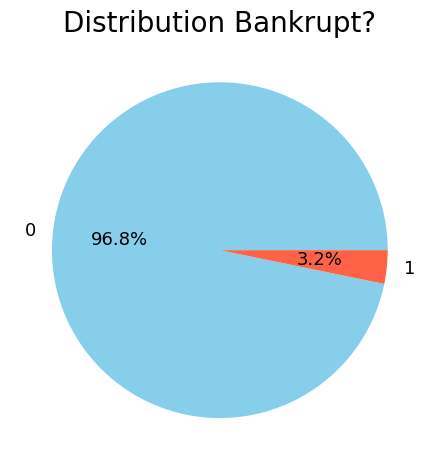

In [4]:
## Bankrupt? distribution

# round(df['Bankrupt?'].value_counts() / len(df), 3)
# df.groupby('Bankrupt?').size() / len(df)
print(round(df['Bankrupt?'].value_counts(normalize=True), 3))
print('')

df.groupby('Bankrupt?').size().plot(kind='pie',
                                    autopct='%.1f%%',
                                    fontsize=13,
                                    colors=['skyblue', 'tomato'])
plt.title('Distribution Bankrupt?', size=20)
plt.tight_layout()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
# Check null
df[df.isnull()].value_counts()

Series([], Name: count, dtype: int64)

In [7]:
# Check columns with nan
df.columns[df.isna().any()].tolist()

[]

In [8]:
# Check "Flag" columns (int)
print(df.iloc[:, 85].unique()) # Liability-Assets Flag
print(df.iloc[:, 94].unique()) # Net Income Flag

[0 1]
[1]


In [9]:
df.iloc[:, 85].value_counts(normalize=True)

 Liability-Assets Flag
0    0.998827
1    0.001173
Name: proportion, dtype: float64

Comments "Flag" columns:  
- columns[85] = Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise. Almost 100% of the companies have Assets >= Liabilities.
- columns[94] = Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise. All companies have Net Income negative for the last two years.


In [10]:
print(df.groupby('Bankrupt?')[' Liability-Assets Flag'].value_counts(normalize=True).unstack())

 Liability-Assets Flag         0         1
Bankrupt?                                 
0                       0.999697  0.000303
1                       0.972727  0.027273


Comments:
- Even in bankrupt companies, in most cases Assets >= Liabilities, so is not a important factor.
- Given this, eliminate "Falg" columns.

In [11]:
# Delete both "Flag" columns
df.drop(df.columns[[85, 94]], axis=1, inplace=True)

Now we'll check Net Value Per Share columns. To consider:
- Net Value Per Share (B): Book Value Per Share(B)
- Net Value Per Share (A): Book Value Per Share(A)
- Net Value Per Share (C): Book Value Per Share(C)

Comments:
- The 3 columns have the same description.
- We will check the correlation. If they have a high correlation, we will stick with just one.

In [12]:
 ## Check corr()
df.iloc[:, [16, 17, 18]].corr()

,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C)
Net Value Per Share (B),1.000000,0.999342,0.999179
Net Value Per Share (A),0.999342,1.000000,0.999837
Net Value Per Share (C),0.999179,0.999837,1.000000


In [13]:
# Delete 2 and keep one
df.drop(df.columns[[16, 18]], axis=1, inplace=True)

In [14]:
df.rename(columns={' Net Value Per Share (A)': ' Net Value Per Share'}, inplace=True)

## EDA "express"
- We will deliberately select 4 features or columns related to liquidity, debt y the balance sheet in general.
- We will compare the ratios between companies that went bankrupt and those that did not.

In [15]:
df1 = df[df['Bankrupt?']==1]
df0 = df[df['Bankrupt?']==0]
df0 = df0.sample(220) # Simple and fast random sample to equalize the number of samples between df1 and df0 and thus graph

In [ ]:
"""
fig, ax = plt.subplots()

ax.hist(df0[' Cash/Total Assets'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')
ax.hist(df1[' Cash/Total Assets'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')
ax.legend(loc='upper right')
plt.ylabel('Count')
plt.title('Distribution of Cash/Total Assets')
plt.show()
"""

"\nfig, ax = plt.subplots()\n\nax.hist(df0[' Cash/Total Assets'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')\nax.hist(df1[' Cash/Total Assets'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')\nax.legend(loc='upper right')\nplt.ylabel('Count')\nplt.title('Distribution of Cash/Total Assets')\nplt.show()\n"

In [ ]:
"""
fig, ax = plt.subplots()

ax.hist(df0[' Debt ratio %'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')
ax.hist(df1[' Debt ratio %'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')
ax.legend(loc='upper right')
plt.ylabel('Count')
plt.title('Distribution of Debt ratio %')
plt.show()
"""

"\nfig, ax = plt.subplots()\n\nax.hist(df0[' Debt ratio %'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')\nax.hist(df1[' Debt ratio %'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')\nax.legend(loc='upper right')\nplt.ylabel('Count')\nplt.title('Distribution of Debt ratio %')\nplt.show()\n"

In [ ]:
"""
fig, ax = plt.subplots()

ax.hist(df0[' Current Ratio'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')
ax.hist(df1[' Current Ratio'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')
ax.legend(loc='upper right')
plt.ylabel('Count')
plt.title('Distribution of Current Ratio')
plt.show()
"""

"\nfig, ax = plt.subplots()\n\nax.hist(df0[' Current Ratio'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')\nax.hist(df1[' Current Ratio'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')\nax.legend(loc='upper right')\nplt.ylabel('Count')\nplt.title('Distribution of Current Ratio')\nplt.show()\n"

In [ ]:
"""
fig, ax = plt.subplots()

ax.hist(df0[' Current Liability to Assets'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')
ax.hist(df1[' Current Liability to Assets'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')
ax.legend(loc='upper right')
plt.ylabel('Count')
plt.title('Distribution of Current Liability to Assets')
plt.show()
"""

"\nfig, ax = plt.subplots()\n\nax.hist(df0[' Current Liability to Assets'], bins=50, density=True, color='green', alpha=0.5, label ='Bankrupt?==0')\nax.hist(df1[' Current Liability to Assets'], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')\nax.legend(loc='upper right')\nplt.ylabel('Count')\nplt.title('Distribution of Current Liability to Assets')\nplt.show()\n"

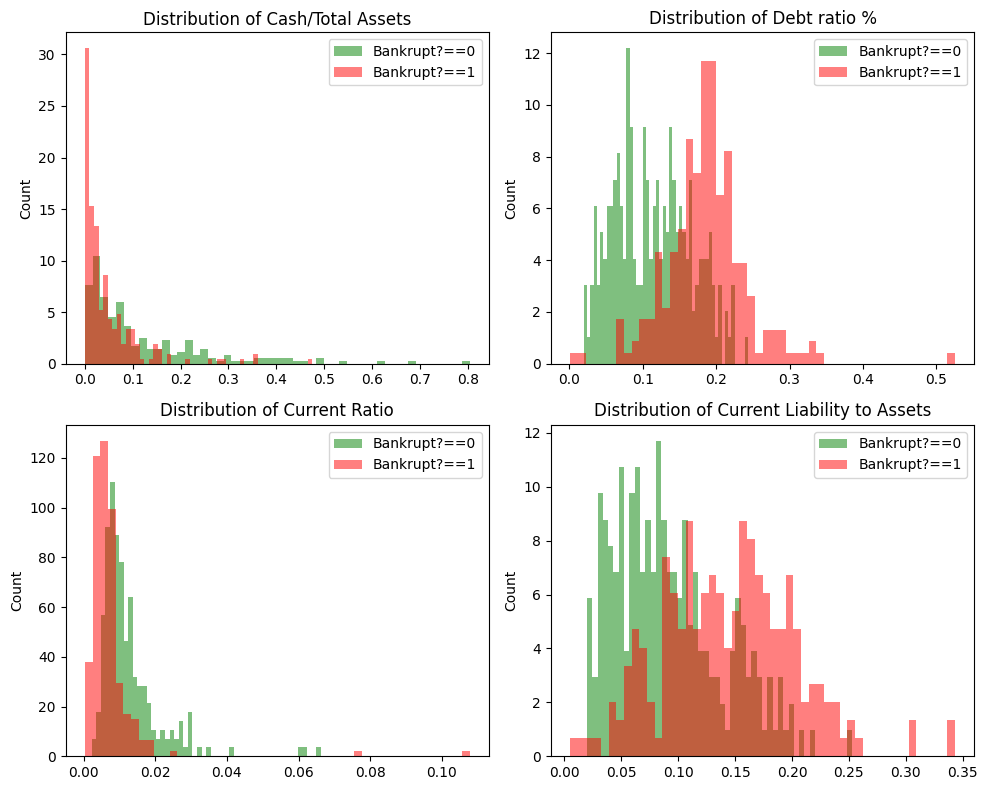

In [16]:
columns_eda = [' Cash/Total Assets', ' Debt ratio %', ' Current Ratio', ' Current Liability to Assets'] # Deliberately chosen columns

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, column in enumerate(columns_eda):
    row = i // 2
    col = i % 2

    axs[row, col].hist(df0[column], bins=50, density=True, color='green', alpha=0.5, label='Bankrupt?==0')
    axs[row, col].hist(df1[column], bins=50, density=True, color='red', alpha=0.5, label='Bankrupt?==1')
    axs[row, col].set_title(f'Distribution of{column}')
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

Comments:
- Cash/Total Assets: Companies that went bankrupt have a lower ratio. Having little cash available is a problem faced by companies that are going bankrupt, since they have few immediate resources with which to maneuver.

- Debt ratio % (total debt/total assets): Companies that went bankrupt have a higher ratio, maintaining debts that present a higher proportion with respect to their assets.

- Current Ratio (current assets/current liabilities): Bankrupt companies have less liquidity, that is, significantly more liquid liabilities than liquid assets with which to face the former. Normally this scenario leads companies into a vicious cycle, using debt to pay debt.

- Current Liability to Assets: Similar to the Current Ratio but the formula is reversed, in addition to using total assets instead of just short-term assets, therefore in this case bankrupt companies have a higher ratio.

Consider that the analysis compares total companies that went bankrupt, with a sample of companies that did not.


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [19]:
## Split data
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [20]:
## RandomizedSearchCV: looking for best hiperparameters
param_dist = {'n_estimators':randint(100, 1000),
              'max_depth':randint(1, 10)}

rand_search = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5, # Number of cross validations
                                 random_state=42)

In [21]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2c83ed0ac0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2c83ed0dc0>},
                   random_state=42)

In [22]:
print('Best hiperparameters:', rand_search.best_params_)

Best hiperparameters: {'max_depth': 7, 'n_estimators': 535}


In [23]:
## Random Forest model hyperparameters set manually
"""
rfCla = RandomForestClassifier(n_estimators=800,
                               max_features='sqrt',
                               max_depth=8,
                               random_state=42)

rfCla.fit(X_train, y_train) # Adjust model
"""

RandomForestClassifier(max_depth=8, n_estimators=800, random_state=42)

In [31]:
## Random Forest Classifier Model with best hiperparameters
rfCla = RandomForestClassifier(n_estimators=rand_search.best_params_['n_estimators'],
                               max_depth=rand_search.best_params_['max_depth'],
                               max_features='sqrt',
                               random_state=42)

rfCla.fit(X_train, y_train) # Adjust model

RandomForestClassifier(max_depth=7, n_estimators=535, random_state=42)

In [32]:
y_pred = rfCla.predict(X_test)

In [33]:
print('Classification Report Random Forest Classifier:')
print(classification_report(y_test, y_pred))

Classification Report Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       1.00      0.12      0.21        51

    accuracy                           0.97      1364
   macro avg       0.98      0.56      0.60      1364
weighted avg       0.97      0.97      0.95      1364



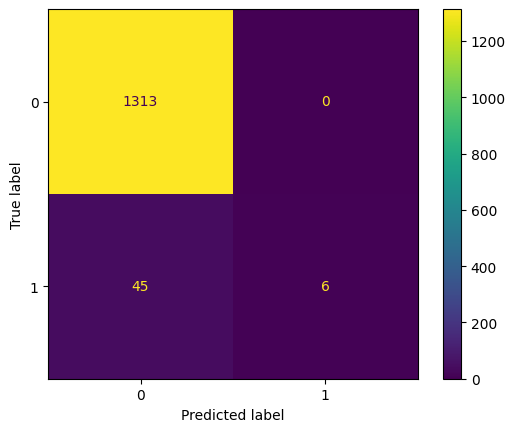

In [34]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

If I were an investor who loves long puts, the fact that the model leaves aside 45 companies out of my orbit, would not be a problem if I do not have open positions, since it would be compensated by allowing me to focus on only 6 companies, of which I know with 100% accuracy that they will go bankrupt.

But if I were a bank, and I had to lend money to companies with financial problems, recall would be my best metric. In this scenario, the model is useless by only labeling 6 companies as 1 of a total of 51 in the y_test.

This is how I see it. What do you think?

## Random Forest: rebalanced

Applying a model where label imbalance is not a factor, a quick way is through the class_weight='balanced' parameter, label 1 is weighted more heavily.

In [37]:
rfCla_bal = RandomForestClassifier(n_estimators=rand_search.best_params_['n_estimators'],
                                   max_depth=rand_search.best_params_['max_depth'],
                                   max_features='log2',
                                   random_state=42,
                                   class_weight='balanced')

rfCla_bal.fit(X_train, y_train)

y_pred2 = rfCla_bal.predict(X_test)

print('Classification Report Random Forest Classifier (balanced):')
print(classification_report(y_test, y_pred2))

Classification Report Random Forest Classifier (balanced):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1313
           1       0.37      0.67      0.48        51

    accuracy                           0.95      1364
   macro avg       0.68      0.81      0.73      1364
weighted avg       0.96      0.95      0.95      1364



In this case, as label 1 has a greater weight, greater predictions of 1 will be generated, but not all are correctly predicted, thus the precision is affected as the false positives (FP) increase (0 labeled as 1).